# SEP532 인공지능 이론과 실제
## Deep Learning Practice 
#### Prof. Ho-Jin Choi
#### School of Computing, KAIST

---

## Introduction to Pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Series and DataFrames
The primary two components of pandas are the `Series` and `DataFrame`. A `Series` is essentially a column, and a `DataFrame` is a multi-dimensional table made up of a collection of Series.  
![Series and DataFrame](images/series-and-dataframe.png)

#### Object creation
Creating a `Series` by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a `DataFrame` by passing a NumPy array, with a datetime index and labeled columns:

In [3]:
dates = pd.date_range('20200414', periods=6)
dates

DatetimeIndex(['2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
               '2020-04-18', '2020-04-19'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2020-04-14,0.128432,0.203319,1.154022,0.596496
2020-04-15,-0.255657,0.586752,-1.451504,0.087205
2020-04-16,0.206777,-1.379770,-0.045443,1.030081
2020-04-17,0.574716,-0.003757,1.115306,0.631852
2020-04-18,-0.793432,0.937883,0.599301,1.103473
2020-04-19,0.138283,-0.094960,0.261198,-1.321964


Creating a `DataFrame` by passing a dict of objects that can be converted to series-like:

In [5]:
df2 = pd.DataFrame({
    'A': 1.0,
    'B': pd.Timestamp('20130102'),
    'C': pd.Series(1.0, index=range(0, 4)),
    'D': np.array([1.0, 2.0, 3.0, 4.0]),
    'E': 'foo',
})
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,1.0,foo
1,1.0,2013-01-02,1.0,2.0,foo
2,1.0,2013-01-02,1.0,3.0,foo
3,1.0,2013-01-02,1.0,4.0,foo


The columns of the resulting `DataFrame` have different dtypes.

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float64
D           float64
E            object
dtype: object

### Viewing data
Here is how to view the top and bottom rows of the frame:

In [7]:
df.head()

,A,B,C,D
2020-04-14,0.128432,0.203319,1.154022,0.596496
2020-04-15,-0.255657,0.586752,-1.451504,0.087205
2020-04-16,0.206777,-1.379770,-0.045443,1.030081
2020-04-17,0.574716,-0.003757,1.115306,0.631852
2020-04-18,-0.793432,0.937883,0.599301,1.103473


In [8]:
df.tail(3)

,A,B,C,D
2020-04-17,0.574716,-0.003757,1.115306,0.631852
2020-04-18,-0.793432,0.937883,0.599301,1.103473
2020-04-19,0.138283,-0.094960,0.261198,-1.321964


Display the index or columns:

In [9]:
df.index

DatetimeIndex(['2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
               '2020-04-18', '2020-04-19'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

`DataFrame.to_numpy()` gives a NumPy representation of the underlying data.

In [11]:
df.to_numpy()

array([[ 0.12843153,  0.20331863,  1.15402207,  0.5964957 ],
       [-0.25565724,  0.5867519 , -1.45150447,  0.08720545],
       [ 0.2067773 , -1.3797699 , -0.04544288,  1.03008121],
       [ 0.57471561, -0.00375682,  1.11530636,  0.63185205],
       [-0.79343219,  0.93788276,  0.59930077,  1.10347253],
       [ 0.13828305, -0.09495993,  0.26119812, -1.32196374]])

`describe()` shows a quick statistic summary of your data:

In [12]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.000147,0.041578,0.272147,0.354524
std,0.469801,0.795948,0.966189,0.898313
min,-0.793432,-1.379770,-1.451504,-1.321964
25%,-0.159635,-0.072159,0.031217,0.214528
50%,0.133357,0.099781,0.430249,0.614174
75%,0.189654,0.490894,0.986305,0.930524
max,0.574716,0.937883,1.154022,1.103473


Transposing your data:

In [13]:
df.T

,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19
A,0.128432,-0.255657,0.206777,0.574716,-0.793432,0.138283
B,0.203319,0.586752,-1.379770,-0.003757,0.937883,-0.094960
C,1.154022,-1.451504,-0.045443,1.115306,0.599301,0.261198
D,0.596496,0.087205,1.030081,0.631852,1.103473,-1.321964


Sorting by an axis:

In [14]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2020-04-14,0.596496,1.154022,0.203319,0.128432
2020-04-15,0.087205,-1.451504,0.586752,-0.255657
2020-04-16,1.030081,-0.045443,-1.379770,0.206777
2020-04-17,0.631852,1.115306,-0.003757,0.574716
2020-04-18,1.103473,0.599301,0.937883,-0.793432
2020-04-19,-1.321964,0.261198,-0.094960,0.138283


Sorting by values:

In [15]:
df.sort_values(by='B')

,A,B,C,D
2020-04-16,0.206777,-1.379770,-0.045443,1.030081
2020-04-19,0.138283,-0.094960,0.261198,-1.321964
2020-04-17,0.574716,-0.003757,1.115306,0.631852
2020-04-14,0.128432,0.203319,1.154022,0.596496
2020-04-15,-0.255657,0.586752,-1.451504,0.087205
2020-04-18,-0.793432,0.937883,0.599301,1.103473


### Selection

#### Getting
Selecting a single column, which yields a `Series`

In [16]:
df['A']

2020-04-14    0.128432
2020-04-15   -0.255657
2020-04-16    0.206777
2020-04-17    0.574716
2020-04-18   -0.793432
2020-04-19    0.138283
Freq: D, Name: A, dtype: float64

This is equivalent to `df.A`

In [17]:
df.A

2020-04-14    0.128432
2020-04-15   -0.255657
2020-04-16    0.206777
2020-04-17    0.574716
2020-04-18   -0.793432
2020-04-19    0.138283
Freq: D, Name: A, dtype: float64

#### Selection by label
For getting a cross secting using a label:

In [18]:
df.loc['20200414']

A    0.128432
B    0.203319
C    1.154022
D    0.596496
Name: 2020-04-14 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [19]:
df.loc[:, ['A', 'B']]

,A,B
2020-04-14,0.128432,0.203319
2020-04-15,-0.255657,0.586752
2020-04-16,0.206777,-1.379770
2020-04-17,0.574716,-0.003757
2020-04-18,-0.793432,0.937883
2020-04-19,0.138283,-0.094960


When using label slicing, both endpoints are *included*:

In [20]:
df.loc['20200414':'20200416', 'A':'B']

,A,B
2020-04-14,0.128432,0.203319
2020-04-15,-0.255657,0.586752
2020-04-16,0.206777,-1.379770


Reduction in the dimensions of the returned object:

In [21]:
df.loc['20200414', ['A', 'B']]

A    0.128432
B    0.203319
Name: 2020-04-14 00:00:00, dtype: float64

#### Selection by position
Select via the position of the passed integers:

In [22]:
df.iloc[3]

A    0.574716
B   -0.003757
C    1.115306
D    0.631852
Name: 2020-04-17 00:00:00, dtype: float64

By integer slices, acting similar to NumPy/Python:

In [23]:
df.iloc[3:5, 0:2]

,A,B
2020-04-17,0.574716,-0.003757
2020-04-18,-0.793432,0.937883


By lists of integer position locations:

In [24]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2020-04-15,-0.255657,-1.451504
2020-04-16,0.206777,-0.045443
2020-04-18,-0.793432,0.599301


#### Boolean indexing
Using a single column's values to select data

In [25]:
df['A'] > 0

2020-04-14     True
2020-04-15    False
2020-04-16     True
2020-04-17     True
2020-04-18    False
2020-04-19     True
Freq: D, Name: A, dtype: bool

In [26]:
df[df['A'] > 0]

,A,B,C,D
2020-04-14,0.128432,0.203319,1.154022,0.596496
2020-04-16,0.206777,-1.379770,-0.045443,1.030081
2020-04-17,0.574716,-0.003757,1.115306,0.631852
2020-04-19,0.138283,-0.094960,0.261198,-1.321964


Selecting values from a `DataFrame` where a boolean condition is met

In [27]:
df > 0

,A,B,C,D
2020-04-14,True,True,True,True
2020-04-15,False,True,False,True
2020-04-16,True,False,False,True
2020-04-17,True,False,True,True
2020-04-18,False,True,True,True
2020-04-19,True,False,True,False


In [28]:
df[df > 0]

,A,B,C,D
2020-04-14,0.128432,0.203319,1.154022,0.596496
2020-04-15,NaN,0.586752,NaN,0.087205
2020-04-16,0.206777,NaN,NaN,1.030081
2020-04-17,0.574716,NaN,1.115306,0.631852
2020-04-18,NaN,0.937883,0.599301,1.103473
2020-04-19,0.138283,NaN,0.261198,NaN


#### Setting
Setting a new column automatically aligns the data by the indexes

In [29]:
df['F'] = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20200415', periods=6))
df

,A,B,C,D,F
2020-04-14,0.128432,0.203319,1.154022,0.596496,NaN
2020-04-15,-0.255657,0.586752,-1.451504,0.087205,1.0
2020-04-16,0.206777,-1.379770,-0.045443,1.030081,2.0
2020-04-17,0.574716,-0.003757,1.115306,0.631852,3.0
2020-04-18,-0.793432,0.937883,0.599301,1.103473,4.0
2020-04-19,0.138283,-0.094960,0.261198,-1.321964,5.0


Setting values by label:

In [30]:
df.loc['20200414', 'A'] = 3
df

,A,B,C,D,F
2020-04-14,3.000000,0.203319,1.154022,0.596496,NaN
2020-04-15,-0.255657,0.586752,-1.451504,0.087205,1.0
2020-04-16,0.206777,-1.379770,-0.045443,1.030081,2.0
2020-04-17,0.574716,-0.003757,1.115306,0.631852,3.0
2020-04-18,-0.793432,0.937883,0.599301,1.103473,4.0
2020-04-19,0.138283,-0.094960,0.261198,-1.321964,5.0


Setting values by position:

In [31]:
df.iloc[0, 1] = 5
df

,A,B,C,D,F
2020-04-14,3.000000,5.000000,1.154022,0.596496,NaN
2020-04-15,-0.255657,0.586752,-1.451504,0.087205,1.0
2020-04-16,0.206777,-1.379770,-0.045443,1.030081,2.0
2020-04-17,0.574716,-0.003757,1.115306,0.631852,3.0
2020-04-18,-0.793432,0.937883,0.599301,1.103473,4.0
2020-04-19,0.138283,-0.094960,0.261198,-1.321964,5.0


Setting by assigning with a NumPy array:

In [32]:
df['D'] = np.array([1, 2, 3, 4, 5, 6])
df

,A,B,C,D,F
2020-04-14,3.000000,5.000000,1.154022,1,NaN
2020-04-15,-0.255657,0.586752,-1.451504,2,1.0
2020-04-16,0.206777,-1.379770,-0.045443,3,2.0
2020-04-17,0.574716,-0.003757,1.115306,4,3.0
2020-04-18,-0.793432,0.937883,0.599301,5,4.0
2020-04-19,0.138283,-0.094960,0.261198,6,5.0


### Operations

#### Statistics
Performing a descriptive statistic:

In [33]:
df.mean()

A    0.478448
B    0.841025
C    0.272147
D    3.500000
F    3.000000
dtype: float64

Same operation on the other axis:

In [34]:
df.mean(axis=1)

2020-04-14    2.538506
2020-04-15    0.375918
2020-04-16    0.756313
2020-04-17    1.737253
2020-04-18    1.948750
2020-04-19    2.260904
Freq: D, dtype: float64

#### Apply
Applying functions to the data:

In [35]:
df

,A,B,C,D,F
2020-04-14,3.000000,5.000000,1.154022,1,NaN
2020-04-15,-0.255657,0.586752,-1.451504,2,1.0
2020-04-16,0.206777,-1.379770,-0.045443,3,2.0
2020-04-17,0.574716,-0.003757,1.115306,4,3.0
2020-04-18,-0.793432,0.937883,0.599301,5,4.0
2020-04-19,0.138283,-0.094960,0.261198,6,5.0


In [36]:
df.apply(np.cumsum) # apply function to each column

,A,B,C,D,F
2020-04-14,3.000000,5.000000,1.154022,1,NaN
2020-04-15,2.744343,5.586752,-0.297482,3,1.0
2020-04-16,2.951120,4.206982,-0.342925,6,3.0
2020-04-17,3.525836,4.203225,0.772381,10,6.0
2020-04-18,2.732403,5.141108,1.371682,15,10.0
2020-04-19,2.870687,5.046148,1.632880,21,15.0


In [37]:
df.apply(np.cumsum, axis=1) # apply function to each row

,A,B,C,D,F
2020-04-14,3.000000,8.000000,9.154022,10.154022,NaN
2020-04-15,-0.255657,0.331095,-1.120410,0.879590,1.879590
2020-04-16,0.206777,-1.172993,-1.218435,1.781565,3.781565
2020-04-17,0.574716,0.570959,1.686265,5.686265,8.686265
2020-04-18,-0.793432,0.144451,0.743751,5.743751,9.743751
2020-04-19,0.138283,0.043323,0.304521,6.304521,11.304521


#### Histogramming

In [38]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    5
1    2
2    4
3    6
4    1
5    0
6    1
7    6
8    5
9    6
dtype: int64

In [39]:
s.value_counts()

6    3
5    2
1    2
2    1
4    1
0    1
dtype: int64

### Merge

#### Concat
pandas provides various facilities for easily combining together `Series` and `DataFrame` objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

Concatenating pandas objects together with `concat()`:

In [40]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.896223,2.756109,0.131383,-0.351305
1,1.461152,-0.626055,0.421213,-0.648857
2,0.105086,0.609955,0.967636,0.537062
3,1.333014,-0.054588,0.331957,0.311845
4,1.253018,-0.201658,-3.105138,1.427573
5,-0.780542,0.823650,1.326596,-0.806073
6,1.254001,0.609393,0.956043,-0.862994
7,-0.092569,-1.158734,-0.027932,-0.798977
8,-0.447341,-0.430637,0.518231,-0.893006
9,-0.530684,-0.557831,-0.275469,0.477359


In [41]:
pieces = [df.iloc[:3], df.iloc[3:7], df.iloc[7:]]

In [42]:
pieces[0]

,0,1,2,3
0,0.896223,2.756109,0.131383,-0.351305
1,1.461152,-0.626055,0.421213,-0.648857
2,0.105086,0.609955,0.967636,0.537062


In [43]:
pieces[1]

,0,1,2,3
3,1.333014,-0.054588,0.331957,0.311845
4,1.253018,-0.201658,-3.105138,1.427573
5,-0.780542,0.823650,1.326596,-0.806073
6,1.254001,0.609393,0.956043,-0.862994


In [44]:
pieces[2]

,0,1,2,3
7,-0.092569,-1.158734,-0.027932,-0.798977
8,-0.447341,-0.430637,0.518231,-0.893006
9,-0.530684,-0.557831,-0.275469,0.477359


In [45]:
pd.concat(pieces)

,0,1,2,3
0,0.896223,2.756109,0.131383,-0.351305
1,1.461152,-0.626055,0.421213,-0.648857
2,0.105086,0.609955,0.967636,0.537062
3,1.333014,-0.054588,0.331957,0.311845
4,1.253018,-0.201658,-3.105138,1.427573
5,-0.780542,0.823650,1.326596,-0.806073
6,1.254001,0.609393,0.956043,-0.862994
7,-0.092569,-1.158734,-0.027932,-0.798977
8,-0.447341,-0.430637,0.518231,-0.893006
9,-0.530684,-0.557831,-0.275469,0.477359


In [46]:
pd.concat(pieces, axis=1)

,0,1,2,3,0,1,2,3,0,1,2,3
0,0.896223,2.756109,0.131383,-0.351305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.461152,-0.626055,0.421213,-0.648857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.105086,0.609955,0.967636,0.537062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,1.333014,-0.054588,0.331957,0.311845,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,1.253018,-0.201658,-3.105138,1.427573,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,-0.780542,0.823650,1.326596,-0.806073,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,1.254001,0.609393,0.956043,-0.862994,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.092569,-1.158734,-0.027932,-0.798977
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.447341,-0.430637,0.518231,-0.893006
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.530684,-0.557831,-0.275469,0.477359


#### Join
SQL style joins with `merge()`

In [47]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [48]:
left

,key,lval
0,foo,1
1,foo,2


In [49]:
right

,key,rval
0,foo,4
1,foo,5


In [50]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another example that can be given is:

In [51]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [52]:
left

,key,lval
0,foo,1
1,bar,2


In [53]:
right

,key,rval
0,foo,4
1,bar,5


In [54]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Grouping
By *group by* we are referring to a process involving one or more of the following steps:
- **Splitting** the data into groups based on some criteria
- **Applying** a function to each group independently
- **Combining** the results into a data structure

In [55]:
df = pd.DataFrame({
   'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
   'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
   'C': np.random.randn(8),
   'D': np.random.randn(8)
})
df

,A,B,C,D
0,foo,one,0.084597,0.118280
1,bar,one,1.514087,-0.835314
2,foo,two,0.390005,0.601018
3,bar,three,-1.371990,0.766248
4,foo,two,1.574906,-2.172914
5,bar,two,1.426373,-1.768676
6,foo,one,1.376386,-0.176789
7,foo,three,-0.287333,0.714615


Grouping and then applying the `sum()` function to the resulting groups

In [56]:
df.groupby('A').sum()

,C,D
A,,
bar,1.568470,-1.837741
foo,3.138562,-0.915791


Grouping by multiple columns forms a hierarchical index, and again we can apply the `sum()` function.

In [57]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    1.514087 -0.835314
    three -1.371990  0.766248
    two    1.426373 -1.768676
foo one    1.460983 -0.058509
    three -0.287333  0.714615
    two    1.964911 -1.571897

### Plotting

<AxesSubplot:>

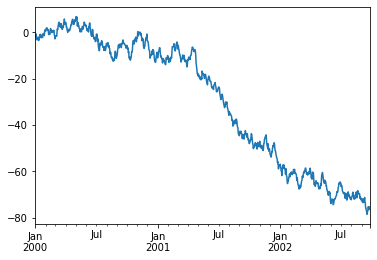

In [58]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('2000-01-01', periods=1000))
ts = ts.cumsum()

ts.plot()

On a `DataFrane`, the `plot()` method is a conveniene to plot all of the columns with labels:

<AxesSubplot:>

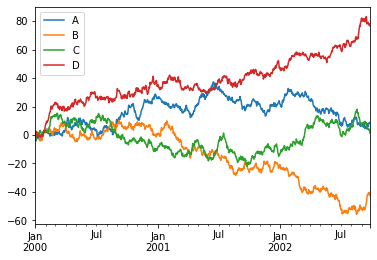

In [59]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()

df.plot()